<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NNTwoLayerWithFrameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import sklearn

from tqdm import tqdm
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop

In [68]:
mat = scipy.io.loadmat('data.mat')
xTrain = np.array(mat['data']['test'][0][0][0][0][0])
yTrain = np.array(mat['data']['test'][0][0][0][0][1])

xTest = np.array(mat['data']['training'][0][0][0][0][0])
yTest = np.array(mat['data']['training'][0][0][0][0][1])

xValidation = np.array(mat['data']['validation'][0][0][0][0][1])
yValidation = np.array(mat['data']['validation'][0][0][0][0][0])

In [69]:
input = Input(shape=(256,))
H = Dense(128, activation='sigmoid')(input)
H = Dense(10, activation='softmax')(H)
model = Model(input, H)
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [70]:
myModel = model.fit(
    xTrain.T, yTrain.T, 
    batch_size=100,
    epochs=20
    )

Epoch 1/20
90/90 [==============================] - 0s 2ms/step - loss: 1.5651 - accuracy: 0.6450
Epoch 2/20
90/90 [==============================] - 0s 2ms/step - loss: 0.7505 - accuracy: 0.8679
Epoch 3/20
90/90 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.9072
Epoch 4/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.9242
Epoch 5/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.9339
Epoch 6/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.9410
Epoch 7/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9437
Epoch 8/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9502
Epoch 9/20
90/90 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9546
Epoch 10/20
90/90 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9568
Epoch 11/20
90/90 [

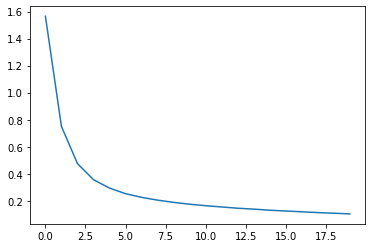

10/10 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9480


In [71]:
plt.plot(myModel.history['loss'])
plt.show()
res = model.evaluate(xTest.T, yTest.T, batch_size = 100)